<a href="https://colab.research.google.com/github/rmendesl/Notebooks/blob/master/Analisando_os_Dados_do_Airbnb_San_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - San Francisco

O [Airbnb](https://www.airbnb.com/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. 

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais como [Marriott](https://marriott-hotels.marriott.com/). Ah, o detalhe é que ele **não possui nenhum hotel**!

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de San Francisco, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in San Francisco (good for visualisations).*

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2019-12-04/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras observações.


In [0]:
# mostrar as 5 primeiras observações
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,226,2019-11-17,1.79,1,71
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,175,2019-12-01,1.38,3,74
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.86,1,1
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,2019-09-10,0.14,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,2018-09-12,0.13,9,365


Vamos listar todos os bairros desse DataFrame

In [0]:
# listar apenas os bairros de maneira única
df['neighbourhood'].unique()

array(['Western Addition', 'Inner Sunset', 'Bernal Heights',
       'Haight Ashbury', 'Mission', 'Potrero Hill', 'Nob Hill',
       'Downtown/Civic Center', 'Castro/Upper Market', 'South of Market',
       'Noe Valley', 'Outer Richmond', 'Presidio Heights', 'Glen Park',
       'Ocean View', 'Pacific Heights', 'Financial District',
       'Twin Peaks', 'Russian Hill', 'Outer Sunset', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'Chinatown',
       'West of Twin Peaks', 'Bayview', 'North Beach', 'Diamond Heights',
       'Outer Mission', 'Parkside', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley', 'Presidio',
       'Treasure Island/YBI'], dtype=object)

### **Q1. Quantas colunas (variáveis) e quantas linhas (observações) o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de observações que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35.847 observações e 106 variáveis (`listings.csv.gz`).

In [0]:
# identificar o volume de dados do DataFrame
print("Observações:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis desse DataFrame
display(df.dtypes)


Observações:	 8533
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes *Missing Values* no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de observações.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em torno de 22% das observações.
* A variável `host_name` têm aproximadamente 0,63% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)


neighbourhood_group               100.000000
reviews_per_month                  22.161022
last_review                        22.161022
host_name                           0.632837
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

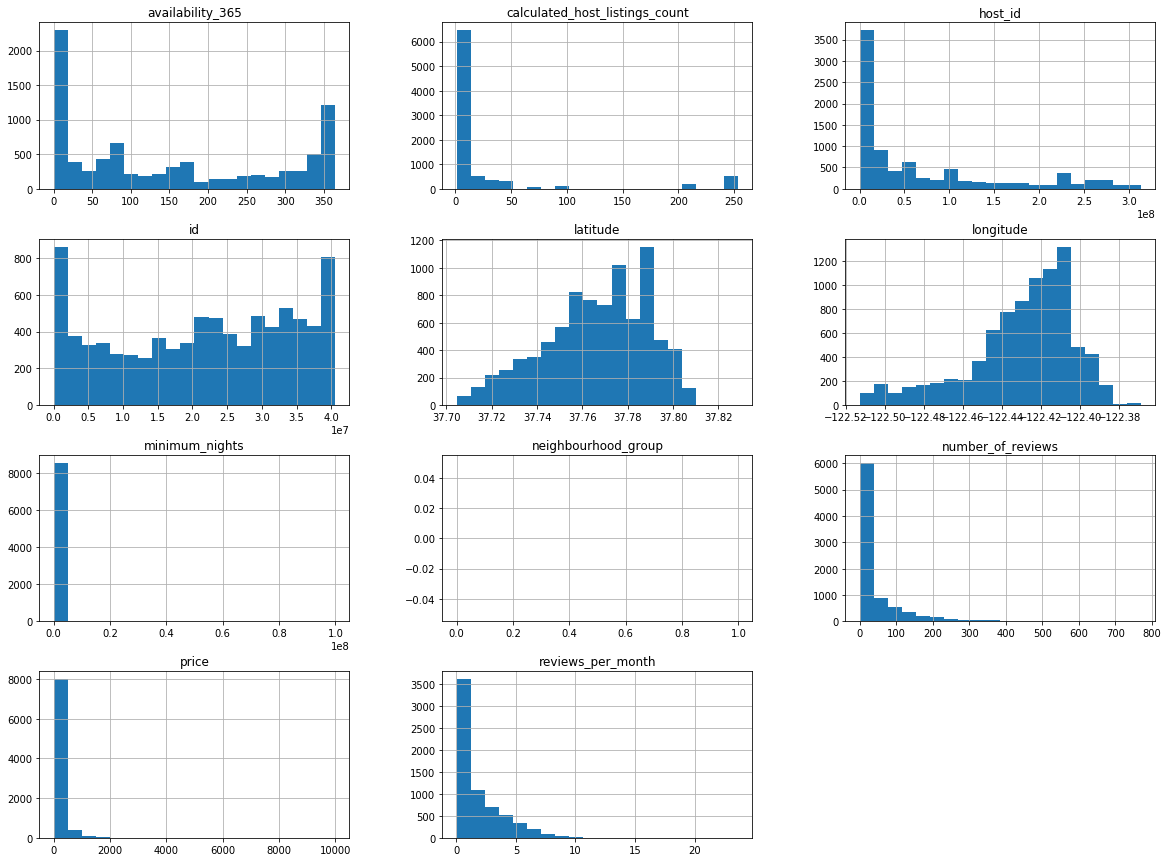

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8533.000000,8.533000e+03,8533.000000,6642.000000,8533.000000,8533.000000
mean,215.412516,1.173567e+04,44.785656,1.842879,27.760811,151.997539
std,300.296057,1.082553e+06,79.476654,2.077444,66.028408,136.858553
min,0.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000e+00,1.000000,0.290000,1.000000,13.000000
50%,150.000000,4.000000e+00,9.000000,1.000000,2.000000,112.000000
75%,235.000000,3.000000e+01,52.000000,2.780000,11.000000,304.000000
max,10000.000000,1.000000e+08,771.000000,23.680000,254.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 235, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para *minimum_nights*


O grande objetivo é verificar a distribuição dos dados. Assim, as conclusões que tiramos ao analisar um boxplot são: 

* Centro dos Dados (média e mediana)
* A Amplitude dos Dados (máximo e mínimo) 
* A Simetria ou Assimetria do conjunto de dados
* A presença de *outliers* ou valores atípicos (valores discrepantes)

minimum_nights: Valores acima de 30:
320 entradas
3.7501%


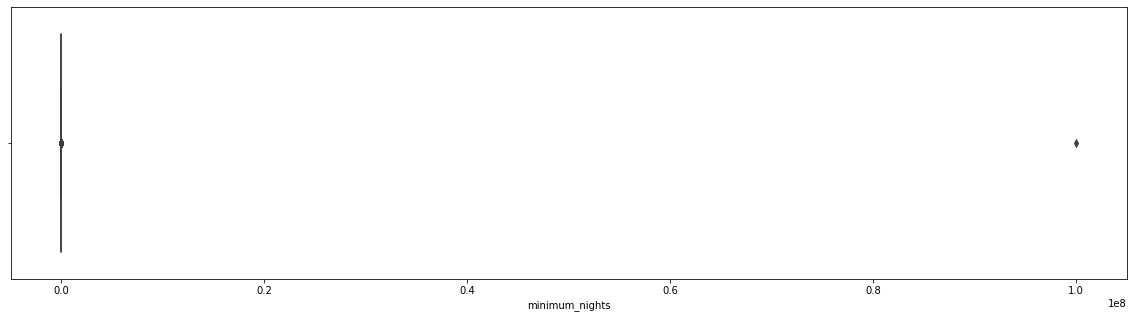

In [0]:
# minimum_nights
plt.figure(figsize=(20,5))
sns.boxplot(df['minimum_nights'])

print("minimum_nights: Valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para *price*


price: Valores acima de 1500
39 entradas
0.4570%


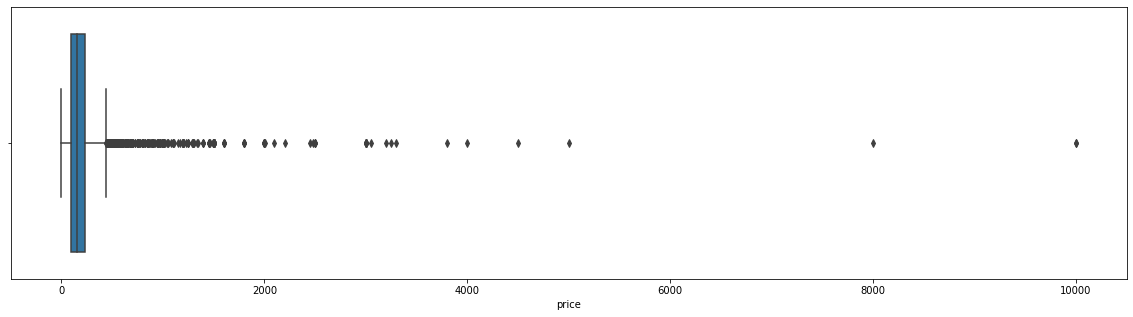

In [0]:
# price
plt.figure(figsize=(20,5))
sns.boxplot(df['price'])

# ver quantidade de valores acima de 1500 para price
print("\nprice: Valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

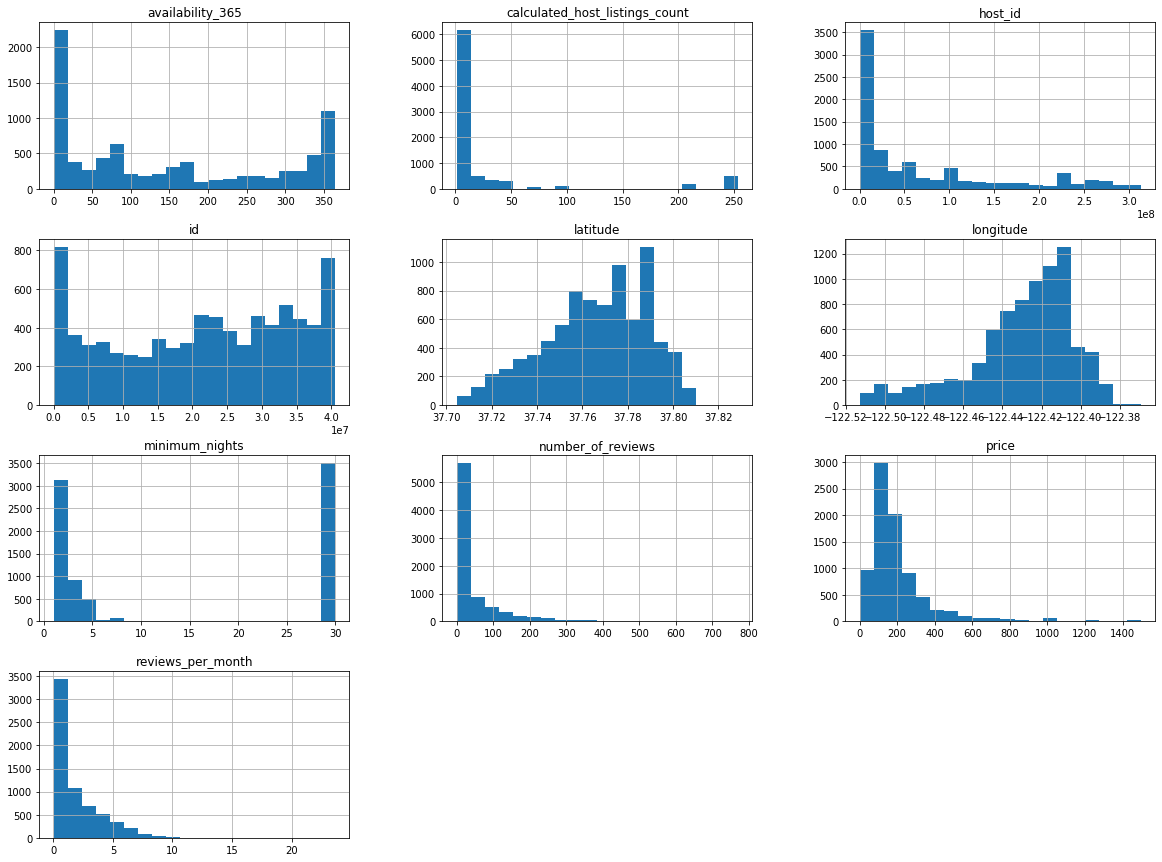

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,15));

### **Q5. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price`
df_clean['price'].mean()

203.75085574572128

### **Q6. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

14.179828850855746

### **Q7. Qual a correlação existente entre as variáveis?**

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.176452,-0.126768,-0.159956,-0.047685,-0.089123
minimum_nights,-0.176452,1.000000,-0.334427,-0.438358,0.311474,0.415734
number_of_reviews,-0.126768,-0.334427,1.000000,0.633678,-0.210042,-0.113525
reviews_per_month,-0.159956,-0.438358,0.633678,1.000000,-0.173913,-0.103318
calculated_host_listings_count,-0.047685,0.311474,-0.210042,-0.173913,1.000000,0.278688
availability_365,-0.089123,0.415734,-0.113525,-0.103318,0.278688,1.000000


O coeficiente de correlação pode variar em termos de valor de -1 a +1. Quanto maior for o valor absoluto do coeficiente, mais forte é a relação entre as variáveis.

Para a correlação de Pearson, um valor absoluto de 1 indica uma relação linear perfeita. A correlação perto de 0 indica que não há relação linear entre as variáveis.

* Correlação negativa trata de uma correlação inversamente proporcional;
* Correlação positiva trata de uma correlação direta;


***Valor de p (+ ou -)***
* 0.00 a 0.19 - Uma correlação bem fraca
* 0.20 a 0.39 - Uma correlação fraca
* 0.40 a 0.69 - Uma correlação moderada
* 0.70 a 0.89 - Uma correlação forte
* 0.90 a 1.00 - Uma correlação muito forte


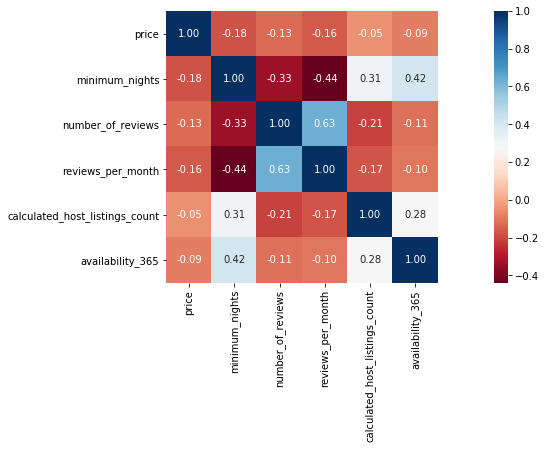

In [0]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4759
Private room       3007
Shared room         260
Hotel room          154
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    58.178484
Private room       36.760391
Shared room         3.178484
Hotel room          1.882641
Name: room_type, dtype: float64

### **Q9. Qual a localidade mais cara de San Francisco?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Presidio Heights       377.818182
Russian Hill           317.971591
Golden Gate Park       316.800000
Pacific Heights        310.626667
Seacliff               275.954545
Marina                 274.248619
Twin Peaks             258.119403
Castro/Upper Market    248.524123
Glen Park              241.272727
North Beach            232.965517
Name: price, dtype: float64

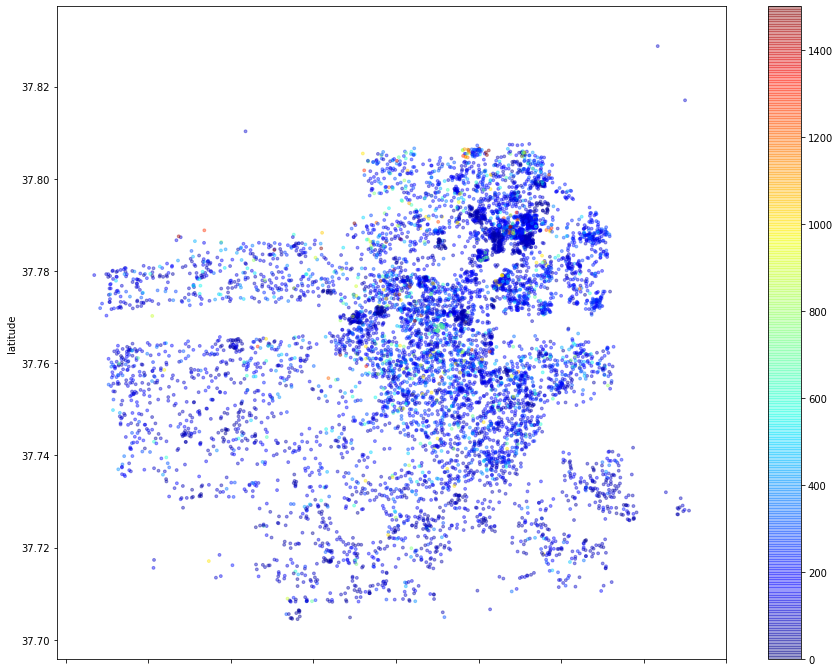

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,12));


## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 variáveis disponíveis.
